In [1]:
#this code iterates on the same image to create a variation of itself
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os 
import time 
from itertools import product
import random
from util import blender, pianoforte

In [2]:
base_path = 'sources\\tateModern\DSC07910.JPG'
base_image = Image.open(base_path)
needs_rotation = True
if needs_rotation :
    base_image = base_image.rotate(-90, expand=True)
base_array = np.array(base_image)
#this are the coordinates of the box to preserve
#preserve = [800, 2000, 1200, 2200] #for MAIN
#preserve = [500, 2000, 0, 1500] #for Lovers
preserve = [10000, 10000, 10000, 1000] #to make its effect irrelevant
preserve = [ 2000, 3000, 2000, 3500] #for the black and white old man
preserve = [500, 3500, 2300, 3300, ] #for the kid with the mini trumpet 
preserve = [ 1400, 3000 ,2100, 3300]#for the kid bent down in full
preserve = [ 1500, 3000 ,350, 1550]#for the kid bent down resized
preserve = [500, 3500, 500, 1500 ] #for the kid with the mini trumpet resized
preserve = [10000, 10000, 10000, 1000] #to make its effect irrelevant
preserve =  [480, 620, 350,500, 200, 400, 100, 270] #for the piece about the holocaust 
preserve = [500, 3500, 2300, 3300, ] #for the kid with the mini trumpet
preserve = [1000, 2000, 1000, 2000 ] #for the seated guy from tate modern

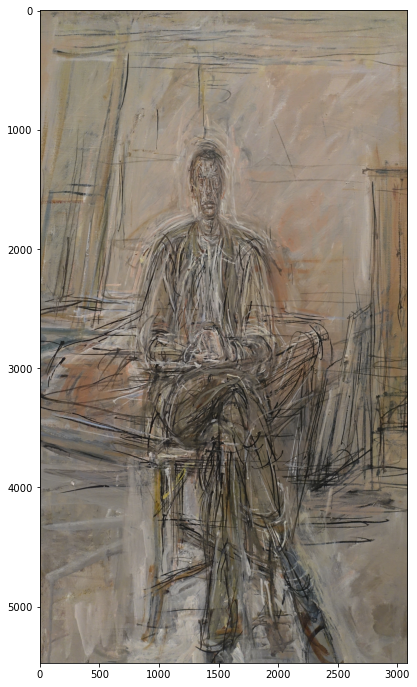

In [3]:
plt.figure(figsize=(12,12))
plt.imshow(base_image)

In [4]:
path = 'sources\\tateModern'
n = 3
pixel_dim = 256
collection = blender.collect_samples(path, n, pixel_dim)
#collection = blender.load_samples(path)


num of fragments is  78


In [5]:
#we initialize clusters as the set of fragments for that image (use n ==1 if loading entire images)
cluster_starts = pianoforte.cluster_indexes_initializer(len(collection) , n)
print(cluster_starts)

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78]


In [6]:
print(collection[0].shape)

(256, 256, 3)


rgb averages is an array of 78 3 dimensional vectors


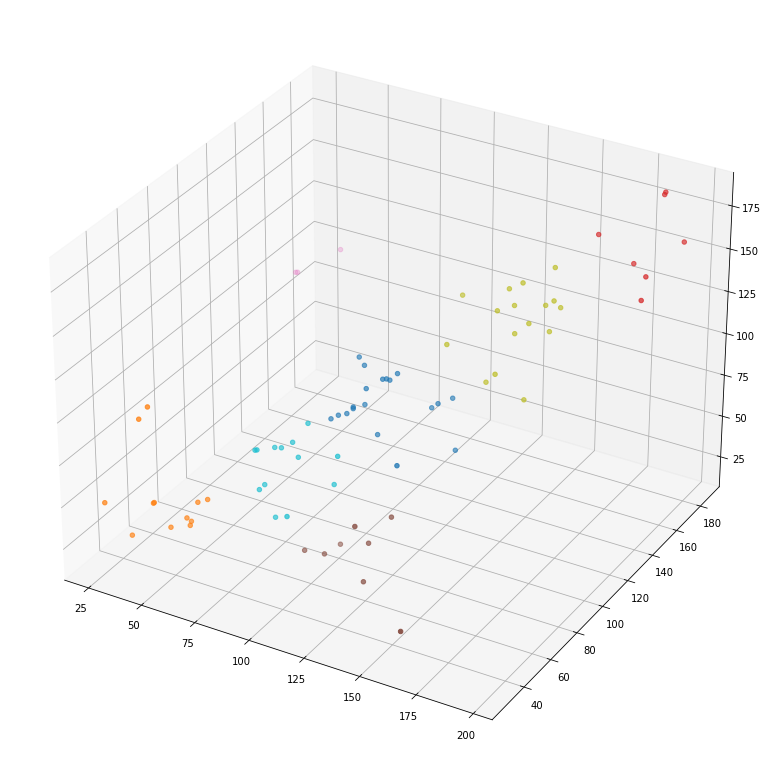

the images are sorted, and the indexes where the clusters start are:  [0, 19, 31, 38, 46, 49, 65, 78]


In [7]:
sorted_collection = collection
num_clusters = 7
sorted_collection, cluster_starts = blender.Kmeans_sort_by_RGB_averages(collection, num_clusters)



square root is  9


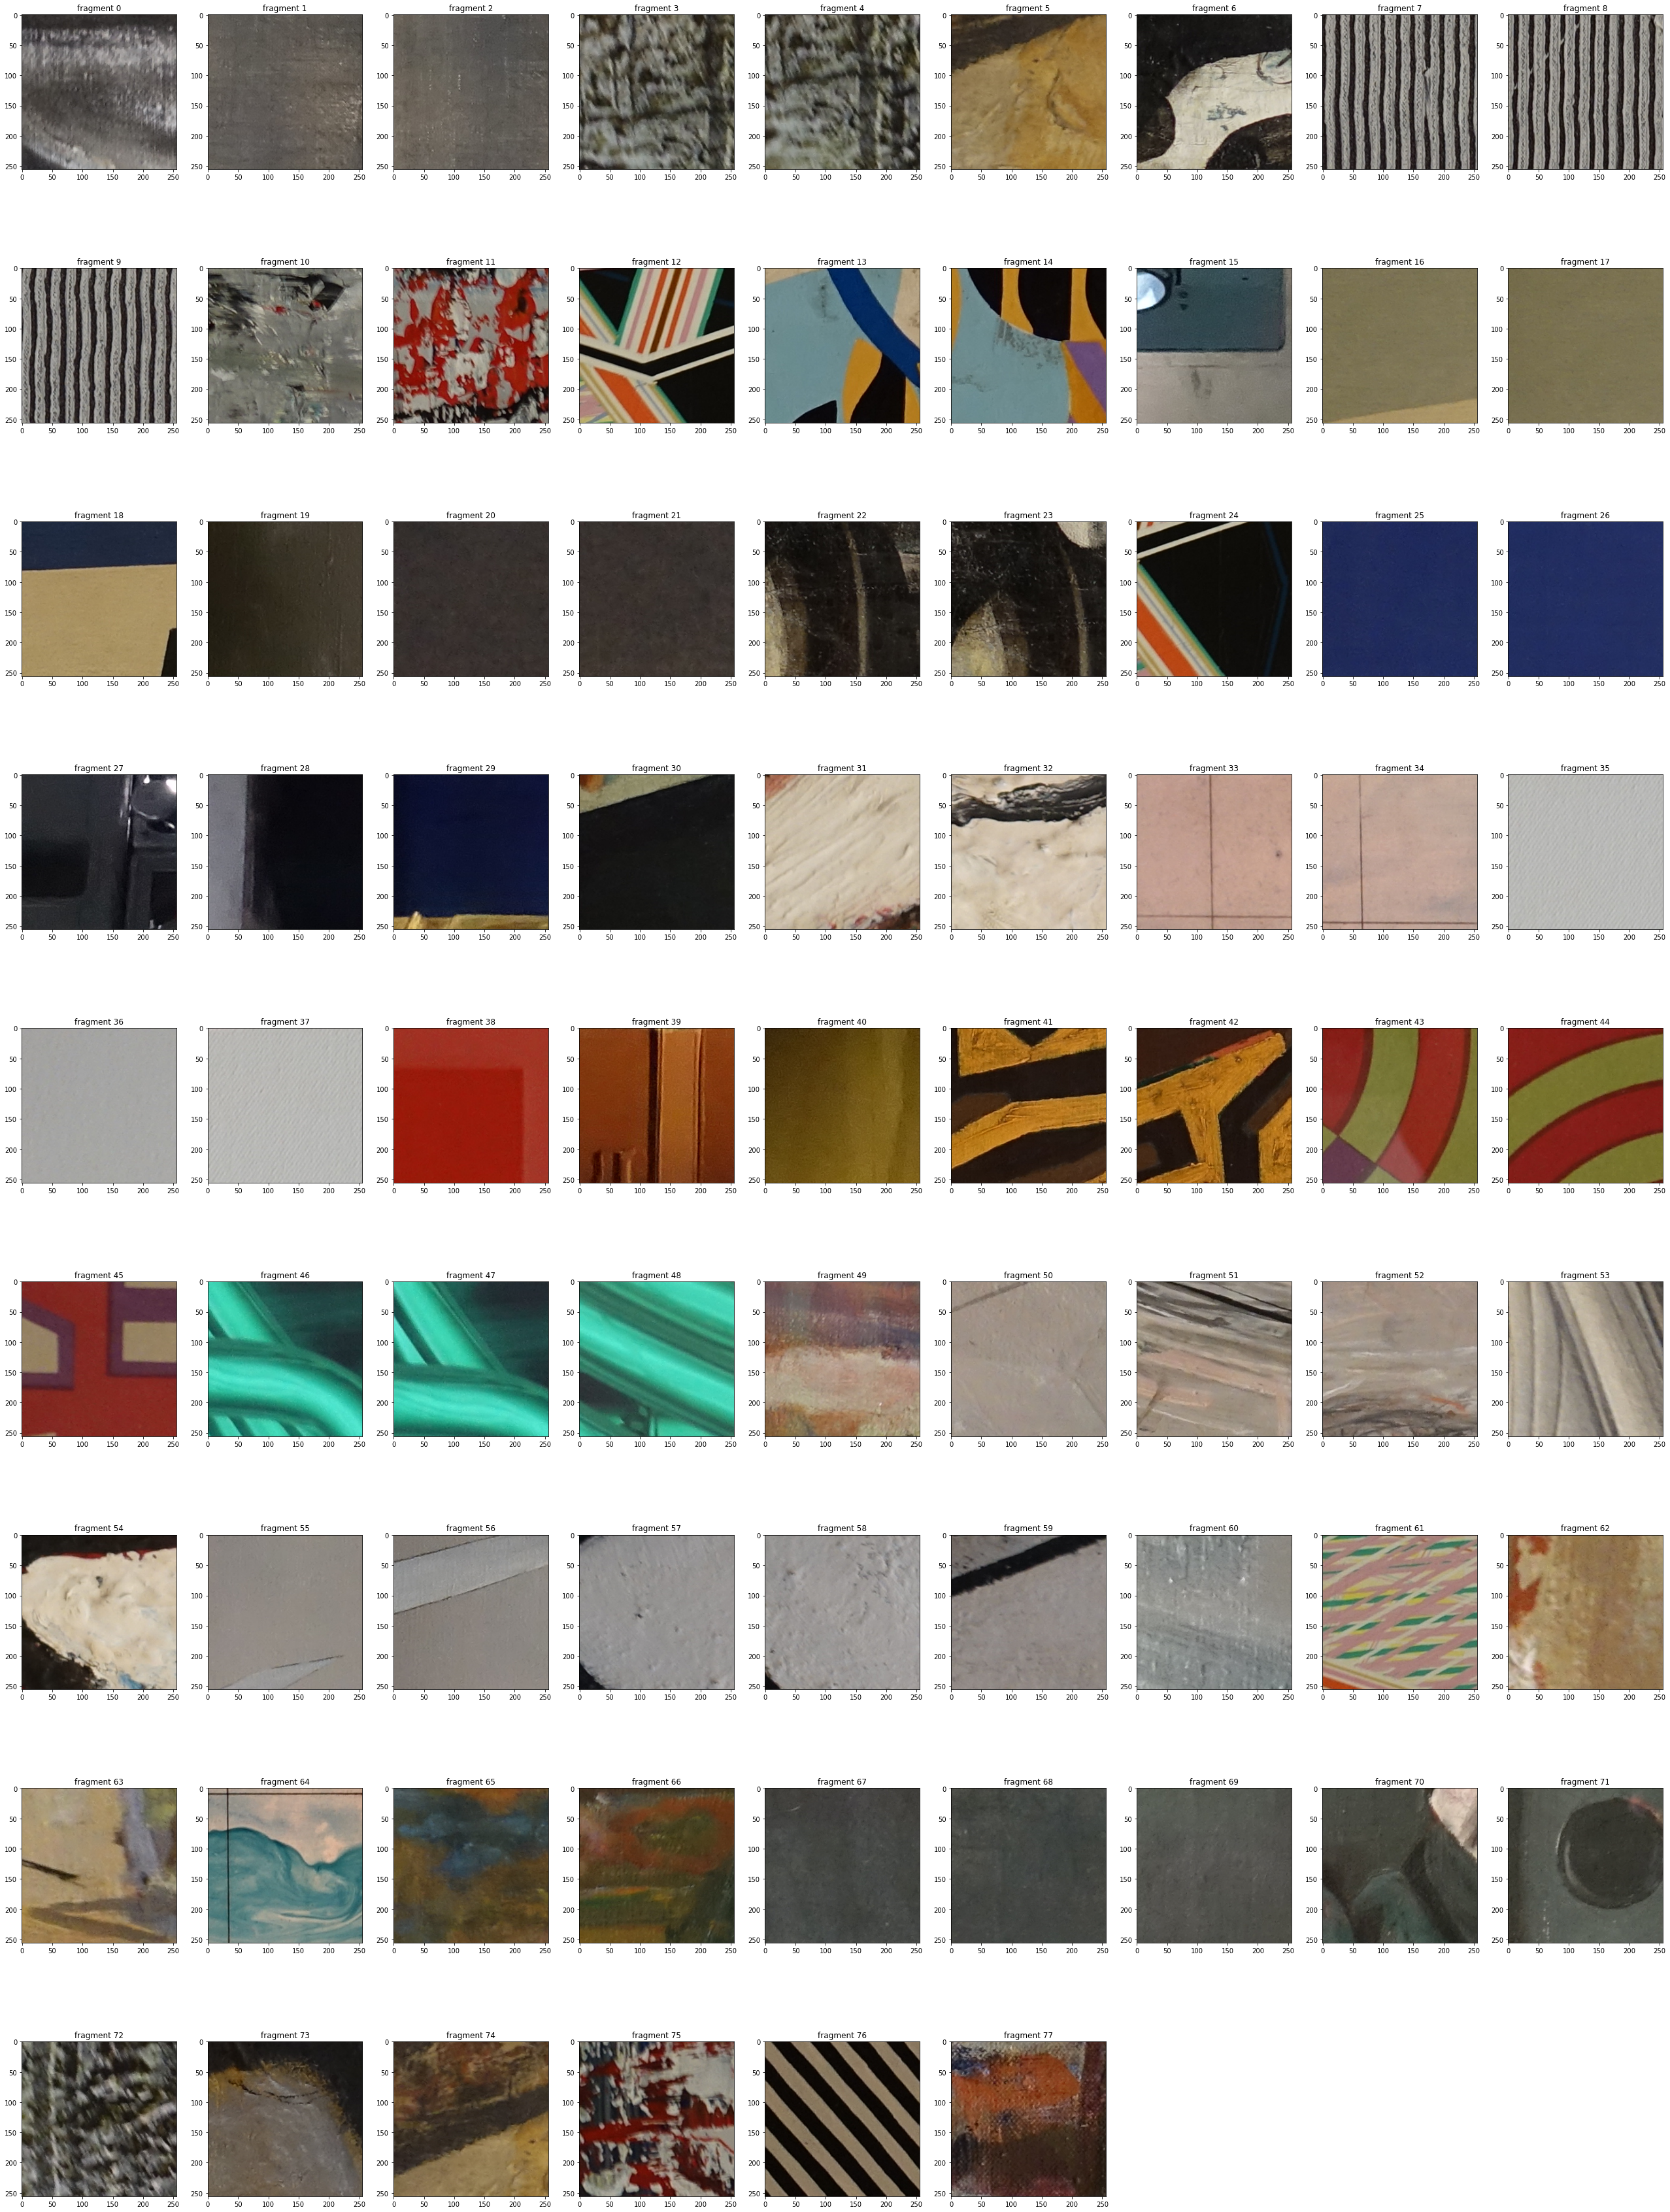

In [8]:

blender.plot_samples(sorted_collection)

In [9]:
collection = sorted_collection

In [10]:
unused_collection = collection


In [15]:
collection = unused_collection
print('remeaning are ', len(collection))

remeaning are  78


one iteration on the collection has terminated
remeaning are  78


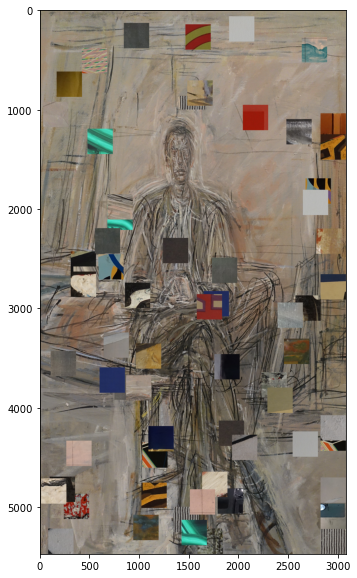

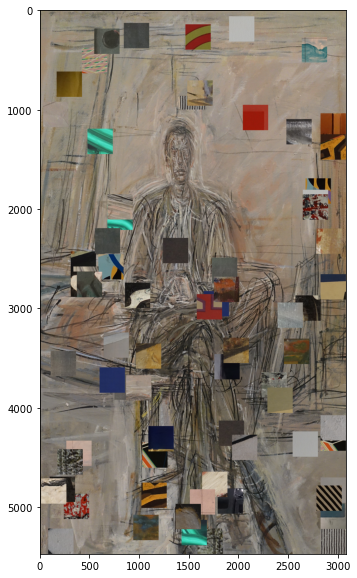

In [12]:
for i in range(2):
    new_image, collection = blender.repurpose_fragments(collection, base_array, 40, preserve, pixel_dim, reutilize=False)
    #new_image, collection = blender.repurpose_images(collection, base_array, 100, preserve)
    
    plt.figure(figsize=(10,10))
    plt.imshow(new_image)

    #needed to not save the images with same name, ending up with rewriting of them
    time.sleep(0.85)

    #to reinstate collection if we finish images
    if(len(collection) == 0):
        print('one iteration on the collection has terminated')
        collection = unused_collection

    #blender.save_result(new_image, 'holocaust')


print('remeaning are ', len(collection))